# Mirar primero la última de mis preguntas antes de continuar en el chatgpt

Con la limpieza del arranque de wsl2 y vscode me he cargado muchas cosas , quizas sea mejor comenzar de nuevo todo. 

Alternativa (si no quieres depender de Snap): https://chatgpt.com/c/69051032-a39c-832f-9b29-843d3dac5ce1

En WSL2 a veces Snap sigue siendo lento o problemático.
Puedes instalar Julia directamente sin Snap:

sudo apt update

sudo apt install wget tar -y

wget https://julialang-s3.julialang.org/bin/linux/x64/1.11/julia-1.11.2-linux-x86_64.tar.gz

tar -xvzf julia-1.11.2-linux-x86_64.tar.gz

sudo mv julia-1.11.2 /opt/

sudo ln -s /opt/julia-1.11.2/bin/julia /usr/local/bin/julia



# Julia

Información sobre maxima y su ejecución bajo Julia.

# Como instalar Julia en Ubuntu

**Para instalar Julia en ubuntu se debe ejecutar los siguientes comandos:**

%sudo apt update


%sudo apt install snapd -y
%sudo systemctl enable --now snapd.
# antes del enable --> esto que lo quité para aligerar vscode 
sudo systemctl unmask snapd.socket
sudo systemctl unmask snapd.service
sudo systemctl unmask snapd.seeded.service


    
%sudo snap install julia - -classic

**Para ejecutar Julia:**

%julia desde la terminal, se debe escribir: julia

**Para instalar el kernell de Julia para Jupyter Notebook:** 

Desde VSCode: La extensión de Julia tiene un botón que permite instalar el kernel.

Desde la terminal: 

      - $julia --> entramos en julia desde la terminal
  
      - using Pkg --> cargamos el paquete de Julia
  
      - Pkg.add("IJulia") --> instalamos IJulia

      - exit() --> salimos de julia 
      

%python -m ipykernel install --user

%pip install jupyter ipykernel

# Ejemplo de un programa en Julia con Kernel Julia

Elegimos el kernel de Julia en el cuaderno de jupyter notebook: 1.12


In [ ]:
A = randn() # Genera un número aleatorio (con o sin decimales)
println("El número aleatorio es: ", A)

if A > 0
    println("A es positivo")
elseif A == 0
    println("A es cero")
else
    println("A es negativo")
end

: 

In [ ]:
suma = 5 + 3.14
producto = 2 * suma
println("La suma es: ", suma)
println("El producto es: ", producto)

: 

# Ejecutar sentencias de maxima desde Julia


#### 1.- Ejecutando un comando maxima (por línea de comandos) 

Utilizando una función read de julia que ejecuta el comando y captura el resultado. 

In [ ]:
# Ejecutar una instrucción Maxima desde Julia
cmd = `maxima --very-quiet -r "display2d:false; integrate(sin(x),x);"`
resultado = read(cmd, String)  # capturar resultado como string
println(resultado)


display2d:false
false
integrate(sin(x),x)
-cos(x)



#### 2.- Ejecutando varios comandos maxima. 

Abriendo una sesión , aplicando varios comandos y cerrando la sesión.  

In [ ]:
cmd = `maxima --very-quiet`
proc = open(cmd, "r+")  # proceso interactivo sin kwargs

# Enviar comandos
write(proc, "display2d:false;\n")
write(proc, "integrate(sin(x),x);\n")
flush(proc)

# Leer salida que haya en el buffer
sleep(0.1)  # dar tiempo a maxima
out = readavailable(proc)
println(String(out))

close(proc)



false
-cos(x)



Si es solo una orden: 

In [ ]:
resultado = read(`maxima --very-quiet -r "display2d:false;integrate(sin(x),x);quit();"`, String)
println(resultado)


display2d:false
false
integrate(sin(x),x)
-cos(x)
quit()



### Otro ejemplo mediante la apertura y cierre de un proceso

In [ ]:
# Abrimos un proceso de maxima en modo interactivo
max_proc = open(`maxima --very-quiet`, "r+")

# Ahora max_proc es un stream bidireccional: podemos escribirle y leerle

In [ ]:
# Enviamos un comando
write(max_proc, "2+2;\n") # escribir comando asignándolo a max_proc
flush(max_proc) # flush

In [ ]:
# Leemos la respuesta
resp = readavailable(max_proc) |> String # |> significa "pasa el resultado a" String
println("Salida de Maxima:\n", resp)

Salida de Maxima:
                                       4



In [ ]:
# Otro comando (dentro del mismo proceso)
write(max_proc, "integrate(sin(x),x);\n")
flush(max_proc)

resp2 = readavailable(max_proc) |> String
println("Salida de Maxima:\n", resp2)

Salida de Maxima:
                                   - cos(x)



In [ ]:
# Al terminar cerramos el proceso.
close(max_proc)

----

# LO SIGUIENTE SE HA PROBADO, PERO NO HA FUNCIONADO


### Ejemplo mediante la apertura de una sesión con maxima

using Maxima

mx= Maxima.Session()

Definimos la puerta Hadamard

H = mx.eval("1/sqrt(2) * matrix([1, 1], [1, -1])")

Estado inicial |0⟩

ket0 = mx.eval("matrix([1], [0])")

Aplicamos la puerta Hadamard

result = mx.eval("H . ket0")

println("Resultado simbólico de H|0⟩:")

println(result)

**Este código no funciona**


**¿Por qué no funciona?**

El paquete Maxima.jl actualmente no funciona con Julia 1.12 (ni con las versiones recientes como 1.10 o 1.11).

Esto se debe a que no ha sido actualizado desde hace años y depende de interfaces antiguas (por ejemplo, PyCall o pipes de sistema) que rompen compatibilidad con las nuevas versiones de Julia.

Maxima.jl fue creado para las versiones de Julia 1.4–1.6.

La inicialización (Maxima.Session() o Maxima.open()), intenta lanzar el proceso de Maxima mediante run() y capturar su output de texto.

En Julia ≥ 1.8, hubo cambios en cómo se gestionan los streams estándar y el I/O buffering, por lo que el proceso de Maxima nunca termina de inicializarse → se queda “colgado” en using Maxima o Maxima.Session().

**¿Qué es Maxima.jl?**

Maxima.jl es (o fue) un paquete de Julia que sirve como puente entre el lenguaje Julia y el sistema algebraico Maxima.

En otras palabras:

Permite ejecutar comandos de Maxima directamente desde Julia y recibir los resultados como objetos de Julia.

**¿Qué es Maxima?**

Maxima es un sistema de álgebra computacional (CAS, Computer Algebra System) muy veterano y potente.
Sirve para hacer:

derivadas, integrales, simplificaciones simbólicas

álgebra matricial y ecuaciones simbólicas

series, límites, cálculo simbólico y numérico.

### Soluciones para el funcionamiento de la sesión maxima desde Julia

**Opción 1: Usar Julia 1.6** 

Para poder utilizar Maxima.jl 


Desde el terminal, dentro del entorno de desarrollo. 

$juliaup add 1.6

$juliaup default 1.6

<img src="./images/julia1_6.PNG" />


**Para instalar juliaup que es un gestor de versiones oficiales de Julia:** 

$ curl -fsSL https://install.julialang.org | sh

In [ ]:
%julia --version

Unrecognized magic `%julia`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


**Sigue sin funcionar: nos remite a  IPython magics**

Unrecognized magic \texttt{%julia}.

Julia does not use the IPython \texttt{%magic} syntax. To interact with the IJulia kernel, use \texttt{IJulia.somefunction(...)}, for example. Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.

----

# Continuamos con lo que sí funciona

### Ejecutar Maxima mediante una función y el read() de julia

Nos comunicamos con Maxima por línea de comandos (más compatible con Julia moderna):

**Problema:** Demasiado complicado.

In [ ]:
# Esta es una de las versiones vistas arriba.

function maxima(cmd::String)
    read(`maxima --very-quiet --batch-string="$cmd;"`, String)
end

println(maxima("expand((x+1)^5)"))



expand((x+1)^5)
                       5      4       3       2
                      x  + 5 x  + 10 x  + 10 x  + 5 x + 1



In [ ]:
# Derivada simbólica
println(maxima("diff(sin(x)^2, x)"))

# Integrales
println(maxima("integrate(exp(-x^2), x, 0, inf)"))

# Matrices
println(maxima("matrix([1,2],[3,4])"))

# Números complejos
println(maxima("rectform(%e^(%i*%pi))"))



diff(sin(x)^2,x)
                                2 cos(x) sin(x)




integrate(exp(-x^2),x,0,inf)
                                   sqrt(%pi)
                                   ---------
                                       2


matrix([1,2],[3,4])
                                   [ 1  2 ]
                                   [      ]
                                   [ 3  4 ]


rectform(%e^(%i*%pi))
                                      - 1



### Celda mágica en Julia como la celda mágica de IPython: macro

No existe en Julia la celda mágica, pero se puede generar algo igual o mejor mediante macros y un módulo.

Podemos utilizar read() , dentro de una función. 

Los comandos maxima deben ir entre comillas. 

In [ ]:
# Esta es una de las versiones vistas arriba.

macro maxima(cmd::String)
        println(read(`maxima --very-quiet --batch-string="$cmd;"`, String))
end


@maxima (macro with 1 method)

In [ ]:
@maxima "expand((x+1)^5)"


expand((x+1)^5)
                       5      4       3       2
                      x  + 5 x  + 10 x  + 10 x  + 5 x + 1



In [ ]:
# Ejemplo 1: Derivada
@maxima "diff(x^2 + sin(x), x)"

# Ejemplo 2: Integral
@maxima "integrate(x^2, x)"

# Ejemplo 3: Simplificación
@maxima "ratsimp((x^2 - 1)/(x - 1))"


diff(x^2+sin(x),x)
                                 cos(x) + 2 x




integrate(x^2,x)
                                       3
                                      x
                                      --
                                      3


ratsimp((x^2-1)/(x-1))
                                     x + 1



### La misma versión de macro : sin comillas

Sin tener que encerrar el comando maxima entre comillas. 

**Problemas:** No mantiene la sesión, cada comando maxima abre y cierra la sesión

Esto no permite utilizar el resultado de la expresión anterior.

In [ ]:
macro maxima(expr)
    cmd = replace(string(expr), "\"" => "\\\"")
    print("💡",read(`maxima --very-quiet --batch-string="$cmd;"`, String))
end

@maxima (macro with 1 method)

In [ ]:
@maxima sqrt(16)  # Debería imprimir 4)

💡
sqrt(16)
                                       4


In [ ]:
@maxima a:5+3*2
@maxima b:a+1

💡
a:5+3*2
                                      11
💡
b:a+1
                                     a + 1


In [ ]:
# Ejemplo 1: Derivada
@maxima diff(x^2 + sin(x), x)

# Ejemplo 2: Integral
@maxima integrate(x^2, x)

# Ejemplo 3: Simplificación
@maxima ratsimp((x^2 - 1)/(x - 1))

@maxima integrate(exp(-x^2),x)


💡
diff(x^2+sin(x),x)
                                 cos(x) + 2 x
💡
integrate(x^2,x)
                                       3
                                      x
                                      --
                                      3
💡
ratsimp((x^2-1)/(x-1))
                                     x + 1
💡
integrate(exp(-x^2),x)
                               sqrt(%pi) erf(x)
                               ----------------
                                      2


#### Probamos algo de algebra lineal para ir adentrándonos en cuántica

In [ ]:
# Estado de Bell Φ⁺ 
@maxima H : 1/sqrt(2) * matrix([1, 1], [1, -1]); 

@maxima I : ident(2);

💡
H:(1/sqrt(2))*matrix([1,1],[1,-1])
                            [    1         1     ]
                            [ -------   -------  ]
                            [ sqrt(2)   sqrt(2)  ]
                            [                    ]
                            [    1          1    ]
                            [ -------  - ------- ]
                            [ sqrt(2)    sqrt(2) ]
💡
I:ident(2)
                                   [ 1  0 ]
                                   [      ]
                                   [ 0  1 ]


## Macro de celda con Julia

**Problema: no tiene sesión continua, esto significa que cada comando se ejecuta en su propia sesión. 

No es posible guardar un resultado en una variable y guardarlo para operar con él con el siguiente

comando enviado a maxima. 



In [ ]:
macro maxima_cell(ex)
    cmds = String[]
    if ex isa Expr && ex.head === :block
        for stmt in ex.args
            s = replace(string(stmt), r"#=.*?=#" => "") |> strip
            s = replace(s, r";+$" => "") |> strip
            !isempty(s) && push!(cmds, s)
        end
    else
        s = replace(string(ex), r"#=.*?=#" => "") |> strip
        s = replace(s, r";+$" => "") |> strip
        !isempty(s) && push!(cmds, s)
    end
    for cmd in cmds
        escaped = replace(cmd, "\"" => "\\\"")
        out = read(`maxima --very-quiet --batch-string="$escaped;"`, String)
        #println("\n💡 Comando: ", cmd)
        #println("💡 Respuesta Maxima:")
        println("💡",out)
        #print(out)
    end
end



@maxima_cell (macro with 1 method)

In [ ]:
# Esta forma de escribir dentro de una celda permite ejecutar varias instrucciones Maxima
# pero cada una se envía por separado a Maxima en diferentes sesiones con lo que las variables no se conservan.
@maxima_cell begin
    a: 5;
    b: 6; 
    c: a + b;
end

💡
a:5
                                       5

💡
b:6
                                       6

💡
c:a+b
                                     b + a



In [ ]:
@maxima_cell begin
    expand((x + 1)^3);
    diff(sin(x)^2, x);
    integrate(exp(-x^2), x);
    H : 1/sqrt(2) * matrix([1, 1], [1, -1]); 
    I : ident(2);
end


💡
expand((x+1)^3)
                               3      2
                              x  + 3 x  + 3 x + 1



💡
diff(sin(x)^2,x)
                                2 cos(x) sin(x)

💡
integrate(exp(-x^2),x)
                               sqrt(%pi) erf(x)
                               ----------------
                                      2

💡
H:(1/sqrt(2))*matrix([1,1],[1,-1])
                            [    1         1     ]
                            [ -------   -------  ]
                            [ sqrt(2)   sqrt(2)  ]
                            [                    ]
                            [    1          1    ]
                            [ -------  - ------- ]
                            [ sqrt(2)    sqrt(2) ]

💡
I:ident(2)
                                   [ 1  0 ]
                                   [      ]
                                   [ 0  1 ]



### Macro de celda manteniendo sesión

https://chat.qwen.ai/c/dd864a81-59a0-4934-9acb-8469b94b3b70

In [ ]:
module MaximaMacro

export @maxima_session

macro maxima_session(ex)
    cmds = String[]
    if ex isa Expr && ex.head === :block
        for stmt in ex.args
            cmd_str = ""
            if stmt isa Expr && stmt.head === :(=)
                try
                    lhs = string(stmt.args[1])
                    rhs = string(stmt.args[2])
                    lhs = replace(lhs, r"\s+" => "")
                    rhs = replace(rhs, r"\s+" => "")
                    if !isempty(lhs) && !isempty(rhs)
                        cmd_str = "$(lhs):$(rhs)"
                    end
                catch
                end
            else
                s = string(stmt)
                s = replace(s, r"#=.+?=#" => "")
                s = replace(s, r";+$" => "")
                s = replace(s, r"\s+" => "")
                if !isempty(s)
                    cmd_str = s
                end
            end
            if !isempty(cmd_str)
                push!(cmds, cmd_str)
            end
        end
    else
        return :(nothing)
    end

    if isempty(cmds)
        return :(nothing)
    end

    # ✅ Último comando con ;, los demás con $
    n = length(cmds)
    for i in 1:n
        if i == n
            cmds[i] *= ";"
        else
            cmds[i] *= "\$"
        end
    end

    full_cmd = join(cmds, "")
    output = read(`maxima --very-quiet --batch-string="$full_cmd"`, String)
    
    # ✅ Extraer solo la parte del resultado (última línea no vacía útil)
    lines = [strip(l) for l in split(output, '\n') if !isempty(strip(l))]
    if !isempty(lines)
        # Tomar la última línea que parece un resultado
        result = lines[end]
        # Eliminar prefijo como (%o4) si existe
        result = replace(result, r"^\s*$$%[io]\d+$$\s*" => "")
        println(result)
    end
    return nothing
end

end

Main.MaximaMacro

In [ ]:
using .MaximaMacro

@maxima_session begin
      t=log(5)
      x=1
      y=t^2 + x
      y
end

log (5) + 1


In [ ]:
@maxima_session begin
    x=3
    y=sin(x)^2
    y
end

sin (3)


### Unimos la macro de línea de celda sin sesión y con sesión

In [ ]:
module MaximaMacro 

export @maxima, @maxima_cell, @maxima_session

macro maxima(expr)
    cmd = replace(string(expr), "\"" => "\\\"")
    print("💡",read(`maxima --very-quiet --batch-string="$cmd;"`, String))
end


macro maxima_cell(ex)
    cmds = String[]
    if ex isa Expr && ex.head === :block
        for stmt in ex.args
            s = replace(string(stmt), r"#=.*?=#" => "") |> strip
            s = replace(s, r";+$" => "") |> strip
            !isempty(s) && push!(cmds, s)
        end
    else
        s = replace(string(ex), r"#=.*?=#" => "") |> strip
        s = replace(s, r";+$" => "") |> strip
        !isempty(s) && push!(cmds, s)
    end
    for cmd in cmds
        escaped = replace(cmd, "\"" => "\\\"")
        out = read(`maxima --very-quiet --batch-string="$escaped;"`, String)
        #println("\n💡 Comando: ", cmd)
        #println("💡 Respuesta Maxima:")
        println("💡",out)
        #print(out)
    end
end


macro maxima_session(ex)
    cmds = String[]
    if ex isa Expr && ex.head === :block
        for stmt in ex.args
            cmd_str = ""
            if stmt isa Expr && stmt.head === :(=)
                try
                    lhs = string(stmt.args[1])
                    rhs = string(stmt.args[2])
                    lhs = replace(lhs, r"\s+" => "")
                    rhs = replace(rhs, r"\s+" => "")
                    if !isempty(lhs) && !isempty(rhs)
                        cmd_str = "$(lhs):$(rhs)"
                    end
                catch
                end
            else
                s = string(stmt)
                s = replace(s, r"#=.+?=#" => "")
                s = replace(s, r";+$" => "")
                s = replace(s, r"\s+" => "")
                if !isempty(s)
                    cmd_str = s
                end
            end
            if !isempty(cmd_str)
                push!(cmds, cmd_str)
            end
        end
    else
        return :(nothing)
    end

    if isempty(cmds)
        return :(nothing)
    end

    # ✅ Último comando con ;, los demás con $
    n = length(cmds)
    for i in 1:n
        if i == n
            cmds[i] *= ";"
        else
            cmds[i] *= "\$"
        end
    end

    full_cmd = join(cmds, "")
    output = read(`maxima --very-quiet --batch-string="$full_cmd"`, String)
    
    # ✅ Extraer solo la parte del resultado (última línea no vacía útil)
    lines = [strip(l) for l in split(output, '\n') if !isempty(strip(l))]
    if !isempty(lines)
        # Tomar la última línea que parece un resultado
        result = lines[end]
        # Eliminar prefijo como (%o4) si existe
        result = replace(result, r"^\s*$$%[io]\d+$$\s*" => "")
        println(result)
    end
    return nothing
end

end



Main.MaximaMacro

In [ ]:
using .MaximaMacro

In [ ]:
# Comando único

@maxima diff(x^2 + sin(x), x)

💡
diff(x^2+sin(x),x)
                                 cos(x) + 2 x


In [ ]:
#Bloque sin sesión continua
@maxima_cell begin
    expand((x + 1)^3)
    integrate(exp(-x^2), x)
    c:2
    d:5
    e:c+d
end

💡
expand((x+1)^3)
                               3      2
                              x  + 3 x  + 3 x + 1

💡
integrate(exp(-x^2),x)
                               sqrt(%pi) erf(x)
                               ----------------
                                      2

💡
c:2
                                       2

💡
d:5
                                       5

💡
e:c+d
                                     d + c



In [ ]:
# Bloque con sesión continua de variables

@maxima_session begin
    a = 5
    b = a^2
    c = a + b
    c  # → 30
end

30


### Lo cargamos desde un fichero externo

Debemos resetear el kernel para que no interfiera con el módulo cargado desde una celda anteriormente.

Tomamos el módulo y lo metemos en el fichero MaximaMacro.jl

In [ ]:
include("MaximaMacro.jl")
using .MaximaMacro

In [ ]:
@maxima diff(x^2 + sin(x), x)

💡 diff(x^2+sin(x),x)
                                 cos(x) + 2 x


In [ ]:
#Bloque sin sesión continua
@maxima_cell begin
    expand((x + 1)^3)
    integrate(exp(-x^2), x)
    c:2
    d:5
    e:c+d
end

💡 expand((x+1)^3)
                               3      2
                              x  + 3 x  + 3 x + 1

💡 integrate(exp(-x^2),x)
                               sqrt(%pi) erf(x)
                               ----------------
                                      2

💡 c:2
                                       2

💡 d:5
                                       5

💡 e:c+d
                                     d + c



In [ ]:
# Bloque con sesión continua de variables

@maxima_session begin
    a = 5
    b = a^2
    c = a + b
    c  # → 30
end

💡 30


### Función en Julia que devuelva el valor de un comando maxima

De  forma que sea utilizable e integrable en un programa  maxima que tenga que hacer un cálculo en maxima

y con ese  resultado se siga ejecutando el algoritmo del programa escrito en Julia

**Función maxima_eval()**

In [ ]:
const _GCL_ENV = Dict(
    "GCL_MEM_MULTIPLE" => "0.3",     # Usa solo el 30% de la RAM física
    "GCL_GC_PAGE_THRESH" => "0.2",   # Inicia GC más temprano
    "GCL_GC_ALLOC_MIN" => "0.01",    # Mínima asignación entre GCs
    "GCL_GC_PAGE_MAX" => "0.5"       # Fuerza GC antes de llegar al 50% del heap
)

function maxima_eval(cmd::String)
    cmd = strip(cmd)
    if !endswith(cmd, ";")
        cmd *= ";"
    end
        cmd *= "\n" # Evita "Premature termination" en GCL
    safe_cmd = replace(cmd, "\"" => "\\\"")
    env = copy(ENV)
    merge!(env, _GCL_ENV)
    raw_output = read(setenv(`maxima --very-quiet --batch-string="$safe_cmd;"`, env), String)
    
    # ✅ Eliminar caracteres no imprimibles (nulos, controles)
    clean_output = filter(c -> c >= ' ' && c <= '~' || c == '\n' || c == '\r', raw_output)
    
    lines = [strip(l) for l in split(clean_output, '\n') if !isempty(strip(l))]
    
    # ✅ Buscar la última línea que sea un número o expresión (no comando)
    for i in length(lines):-1:1
        l = lines[i]
        # Si contiene :, es un comando (x:4)
        # Si empieza con (, es un prompt (%o1)
        if !contains(l, ":") && !startswith(l, "(") && !startswith(l, "incorrect syntax") && 
           !startswith(l, "batch(") && l != ";" && l != "^"
           return l
        end
    end
    return ""
end


function maxima_eval_float(cmd::String)
    res = maxima_eval(cmd)
    if res == ""
        return res
    end

    try
    # Intentar convertir a número
        return parse(Float64, res)
    catch
    # Si falla, devolver el string original
        return res
    end
end

maxima_eval_float (generic function with 1 method)

In [ ]:
# Ejemplos
println(maxima_eval("diff(x^2 + sin(x), x)"))
# → 2*x+cos(x)

println(maxima_eval("integrate(exp(-x^2), x)"))
# → sqrt(%pi)*erf(x)/2

x_val = maxima_eval("x:5; x^2 + 1")
println(x_val)  # → 26

# Ejemplo de devolución numérica
maxima_eval_float("float(22/7)")  # → 3.142857142857143

cos(x) + 2 x
2
26


3.142857142857143

### Añadimos las funciones a nuestro módulo

Utilizamos GCL GNU Common Lisp

In [ ]:
module MaximaMacro

export @maxima, @maxima_cell, @maxima_session, maxima_eval, maxima_eval_float

# Variables de entorno para GCL (según Camm Maguire, GCL developer)
# Fuente: https://lists.gnu.org/archive/html/gcl-devel/2017-09/msg00000.html
const _GCL_ENV = Dict(
    "GCL_MEM_MULTIPLE" => "0.3",     # Usa solo el 30% de la RAM física
    "GCL_GC_PAGE_THRESH" => "0.2",   # Inicia GC más temprano
    "GCL_GC_ALLOC_MIN" => "0.01",    # Mínima asignación entre GCs
    "GCL_GC_PAGE_MAX" => "0.5"       # Fuerza GC antes de llegar al 50% del heap
)


"""
    maxima_eval(cmd::String)

Ejecuta un comando de Maxima y devuelve el resultado como `String`.

# Ejemplo

maxima_eval("diff(x^2, x)")  # → "2*x"
maxima_eval("x:3; x^2+1")  # → "9"

"""


function maxima_eval(cmd::String)
    cmd = strip(cmd)
    if !endswith(cmd, ";")
        cmd *= ";"
    end
        cmd *= "\n" # Evita "Premature termination" en GCL
    safe_cmd = replace(cmd, "\"" => "\\\"")
    env = copy(ENV)
    merge!(env, _GCL_ENV)
    raw_output = read(setenv(`maxima --very-quiet --batch-string="$safe_cmd;"`, env), String)
    
    # ✅ Eliminar caracteres no imprimibles (nulos, controles)
    clean_output = filter(c -> c >= ' ' && c <= '~' || c == '\n' || c == '\r', raw_output)
    
    lines = [strip(l) for l in split(clean_output, '\n') if !isempty(strip(l))]
    
    # ✅ Buscar la última línea que sea un número o expresión (no comando)
    for i in length(lines):-1:1
        l = lines[i]
        # Si contiene :, es un comando (x:4)
        # Si empieza con (, es un prompt (%o1)
        if !contains(l, ":") && !startswith(l, "(") && !startswith(l, "incorrect syntax") && 
           !startswith(l, "batch(") && l != ";" && l != "^"
           return l
        end
    end
    return ""
end

"""
    maxima_eval_float(cmd::String)

Ejecuta un comando de Maxima y devuelve el resultado como Float64 si es numérico.
Si no es numérico, devuelve el resultado como String.

# Ejemplo
maxima_eval_float("float(22/7)")      # → 3.142857142857143
maxima_eval_float("sqrt(2)")          # → "sqrt(2)" (no es numérico sin float())
maxima_eval_float("float(sqrt(2))")   # → 1.4142135623730951"

"""

function maxima_eval_float(cmd::String)
    res = maxima_eval(cmd)
    if res == ""
        return res
    end

    try
    # Intentar convertir a número
        return parse(Float64, res)
    catch
    # Si falla, devolver el string original
        return res
    end
end

"""
@maxima expr

Ejecuta un único comando de Maxima.
"""
macro maxima(expr)
    cmd_str=string(expr)
    escaped_cmd = replace(cmd_str, "\"" => "\\\"")
    out=read(`maxima --very-quiet --batch-string="$escaped_cmd;"`, String)
    #println("DEBUG: Salida = ", repr(out[2:end])) # Depuración
    out=out[2:end] # Eliminar el primer carácter de nueva línea
    print("💡 ", out)
end

"""
@maxima_cell begin ... end

Ejecuta varios comandos, cada uno en su propia instancia.
"""
macro maxima_cell(ex)
    cmds = String[]
    if ex isa Expr && ex.head === :block
        for stmt in ex.args
            s = replace(string(stmt), r"#=.+?=#" => "") |> strip
            s = replace(s, r";+$" => "") |> strip
            !isempty(s) && push!(cmds, s)
        end
    else
        s = replace(string(ex), r"#=.+?=#" => "") |> strip
        s = replace(s, r";+$" => "") |> strip
        !isempty(s) && push!(cmds, s)
    end
    for cmd in cmds
        escaped = replace(cmd, "\"" => "\\\"")
        out = read(`maxima --very-quiet --batch-string="$escaped;"`, String)
        out=(out[2:end]) # Eliminar el primer carácter de nueva línea
        println("💡 ", out)
    end
end

"""
@maxima_session begin ... end

Ejecuta un bloque en una única sesión (estado persistente).
"""
macro maxima_session(ex)
    cmds = String[]
    if ex isa Expr && ex.head === :block
        for stmt in ex.args
            cmd_str = ""
            if stmt isa Expr && stmt.head === :(=)
                try
                    lhs = string(stmt.args[1])
                    rhs = string(stmt.args[2])
                    lhs = replace(lhs, r"\s+" => "")
                    rhs = replace(rhs, r"\s+" => "")
                    if !isempty(lhs) && !isempty(rhs)
                        cmd_str = "$(lhs):$(rhs);"
                    end
                catch
                end
            else
                s = string(stmt)
                s = replace(s, r"#=.+?=#" => "")
                s = replace(s, r";+$" => "")
                s = replace(s, r"\s+" => "")
                if !isempty(s)
                    cmd_str = s * ";"
                end
            end
            if !isempty(cmd_str)
                push!(cmds, cmd_str)
            end
        end
    else
        return :(nothing)
    end

    if isempty(cmds)
        return :(nothing)
    end

    full_cmd = join(cmds, " ")
    escaped_cmd = replace(full_cmd, "\"" => "\\\"")
    
    # Depuración
    #println("DEBUG: Comando = ", repr(full_cmd))
    
    output = read(`maxima --very-quiet --batch-string="$escaped_cmd"`, String)
    #println("DEBUG: Salida = ", repr(output))
    
    # Extraer el último resultado numérico o simbólico
    lines = [strip(l) for l in split(output, '\n') if !isempty(strip(l))]
    # Tomar la última línea que NO es un comando (no contiene :)
    for i in length(lines):-1:1
        if !contains(lines[i], ":") && !startswith(lines[i], "(")
            println("💡 ",lines[i])
            return nothing
        end
    end
    if !isempty(lines)
        println(lines[end])
    end
    return nothing
end

end # module MaximaMacro

Main.MaximaMacro

In [ ]:
using .MaximaMacro

In [ ]:
@maxima diff(x^2 + sin(x), x)

💡 diff(x^2+sin(x),x)
                                 cos(x) + 2 x


In [ ]:
@maxima (sin(3))^2

💡 sin(3)^2
                                       2
                                    sin (3)


In [ ]:
@maxima_cell begin
    expand((x + 1)^3)
    integrate(exp(-x^2), x)
    c:2
    d:5
    e:c+d
end

💡 expand((x+1)^3)
                               3      2
                              x  + 3 x  + 3 x + 1

💡 integrate(exp(-x^2),x)
                               sqrt(%pi) erf(x)
                               ----------------
                                      2

💡 c:2
                                       2

💡 d:5
                                       5

💡 e:c+d
                                     d + c



In [ ]:
println("=== 1. maxima_eval (resultado simbólico) ===")
res = maxima_eval("integrate(x^2, x)")
println("💡 ∫ x² dx = ", res)


=== 1. maxima_eval (resultado simbólico) ===
💡 ∫ x² dx = 3


In [ ]:
println("\n=== 2. maxima_eval_float (resultado numérico) ===")
num = maxima_eval_float("float(22/7)")
println("💡 22/7 ≈ ", num)


=== 2. maxima_eval_float (resultado numérico) ===
💡 22/7 ≈ 3.142857142857143


In [ ]:
println("\n=== 3. maxima_eval con asignación ===")
val = maxima_eval("x:4; print(x^2 + 1);")
println("💡 x² + 1 con x=4 → ", val)


=== 3. maxima_eval con asignación ===
💡 x² + 1 con x=4 → 17


In [ ]:
val = maxima_eval("x:4; print(x^2 + 1);")
println("💡 Resultado: '", val, "'")

💡 Resultado: '17'


In [ ]:
println("\n=== 4. maxima_eval_float con expresión no numérica ===")
sym = maxima_eval_float("sqrt(2)")
println("💡 sqrt(2) sin float() → ", sym)


=== 4. maxima_eval_float con expresión no numérica ===
💡 sqrt(2) sin float() → sqrt(2)


In [ ]:
println("\n=== 5. @maxima_session (sesión con estado) ===")
@maxima_session begin
    a = 5
    b = a^2
    c = a + b
    c
end


=== 5. @maxima_session (sesión con estado) ===


💡 30


# Versión @maxima_session_qm begin     quotations marks

Veamos como funciona una versión de session que envía los comandos con comillas

Con esto no tenemos que crear un DSL para traducir de lo que escribimos y que parsea Julia para que lo cambie 

y lo interprete bien maxima, ya que entre comillas se envía el comando a maxima sin tocar. 

Solo puede fallar si es escribe mal el comando. 


In [ ]:
const _GCL_ENV = Dict(
    "GCL_MEM_MULTIPLE" => "0.3",     # Usa solo el 30% de la RAM física
    "GCL_GC_PAGE_THRESH" => "0.2",   # Inicia GC más temprano
    "GCL_GC_ALLOC_MIN" => "0.01",    # Mínima asignación entre GCs
    "GCL_GC_PAGE_MAX" => "0.5"       # Fuerza GC antes de llegar al 50% del heap
)
macro maxima_session_qm(ex)
    cmds = String[]
    
    # Función recursiva para extraer todas las cadenas de una expresión
    function extract_strings(e)
        if e isa String
            push!(cmds, e)
        elseif e isa Expr
            if e.head === :string
                push!(cmds, eval(e))
            elseif e.head === :macrocall
                # Extraer de Core.@doc "..."
                for arg in e.args
                    extract_strings(arg)
                end
            elseif e.head === :block
                for arg in e.args
                    extract_strings(arg)
                end
            else
                # Buscar cadenas en argumentos
                for arg in e.args
                    extract_strings(arg)
                end
            end
        end
    end

    extract_strings(ex)

    if isempty(cmds)
        error("Usa comillas: @maxima_session begin \"comando\" end")
    end

    # Construir script para Maxima
    script_lines = [cmd * ";" for cmd in cmds]
    full_script = join(script_lines, " ") * "\n"
    escaped_script = replace(full_script, "\"" => "\\\"")
    
    # Variables de GCL (Camm Maguire, 2017)
    env = copy(ENV)
    env["GCL_MEM_MULTIPLE"] = "0.3"     # 30% de RAM
    env["GCL_GC_PAGE_THRESH"] = "0.2"
    env["GCL_GC_ALLOC_MIN"] = "0.01"
    env["GCL_GC_PAGE_MAX"] = "0.5"
    
    output = read(setenv(`maxima --very-quiet --batch-string="$escaped_script;"`, env), String)
    
    # Mostrar último resultado útil (ignorar definiciones)
    lines = [strip(l) for l in split(output, '\n') if !isempty(strip(l))]
    for i in length(lines):-1:1
        l = lines[i]
        if !startswith(l, "batch(") &&
           !contains(l, "read and interpret") &&
           !startswith(l, "incorrect syntax") &&
           !contains(l, "Premature termination") &&
           !contains(l, ":=") &&   # Ignorar f(x) := ...
           l != ";" &&
           l != "^"
            println("💡 ", l)
            return nothing
        end
    end
    println("💡 ^")
end

@maxima_session_qm (macro with 1 method)

In [ ]:
@maxima_session begin
    "f(x) := x^3 - 3*x + 2"
    "factor(f(x))"
end

💡 (x - 1)  (x + 2)


**No podríamos poner "display2:false por defecto? 

In [ ]:

@maxima_session begin
    "display2d:false"
    "f(x) := x^3 - 3*x + 2"
    "factor(f(x))"
end

💡 (x-1)^2*(x+2)


**Sin begin y end**

In [ ]:
const _GCL_ENV = Dict(
    "GCL_MEM_MULTIPLE" => "0.3",     # Usa solo el 30% de la RAM física
    "GCL_GC_PAGE_THRESH" => "0.2",   # Inicia GC más temprano
    "GCL_GC_ALLOC_MIN" => "0.01",    # Mínima asignación entre GCs
    "GCL_GC_PAGE_MAX" => "0.5"       # Fuerza GC antes de llegar al 50% del heap
)

macro maxima_session(cmds...)
    # cmds es una tupla de cadenas
    script = join([cmd * ";" for cmd in cmds], " ") * "\n"
    escaped = replace(script, "\"" => "\\\"")
    
    # Variables de GCL (Camm Maguire, 2017)
    env = copy(ENV)
    env["GCL_MEM_MULTIPLE"] = "0.3"
    env["GCL_GC_PAGE_THRESH"] = "0.2"
    env["GCL_GC_ALLOC_MIN"] = "0.01"
    env["GCL_GC_PAGE_MAX"] = "0.5"
    
    output = read(setenv(`maxima --very-quiet --batch-string="$escaped;"`, env), String)
    
    # Mostrar último resultado útil
    lines = [strip(l) for l in split(output, '\n') if !isempty(strip(l))]
    for i in length(lines):-1:1
        l = lines[i]
        if !startswith(l, "batch(") && !contains(l, "read and interpret") && 
           !startswith(l, "incorrect syntax") && l != ";" && l != "^"
            println("💡 ", l)
            return
        end
    end
    println("💡 ^")
end

@maxima_session (macro with 1 method)

In [ ]:
@maxima_session(
    "display2d:false",
    "f(x) := x^3 - 3*x + 2",
    "factor(f(x))"
)

💡 (x-1)^2*(x+2)


**Seguir por aquí**

https://chat.qwen.ai/c/dd864a81-59a0-4934-9acb-8469b94b3b70

revisar si la macro con comillas se puede fundir con la otra macro_session 
y no tener dos: 

 @macro_session

 @macro_session_qm

# Nueva versión MaximaMacro.jl ()

Una sola macro con paréntesis y comandos maxima entrecomillados. 

Se mantiene la sesión en todas las celdas del notebook. 

https://chat.qwen.ai/c/fe2d35a2-96c3-4bc6-8f64-a0588dc6c3f2

In [ ]:
import Pkg; 
Pkg.add("Symbolics");
Pkg.add("MacroTools");

In [ ]:
module MaximaMacroJulia

using MacroTools

export @maxima_session,ensure_maxima_started, send_to_maxima, read_maxima_output

# Función auxiliar para ejecutar comandos Maxima con estado persistente
const MAXIMA_SESSION = Ref{Any}(nothing)

function ensure_maxima_started()
    if MAXIMA_SESSION[] === nothing
        MAXIMA_SESSION[] = open(`maxima --very-quiet`, "r+")
    end
    return MAXIMA_SESSION[]
end

function send_to_maxima(io::IO, cmd::String)
    write(io, cmd * "\n")
    flush(io)
end

function read_maxima_output(io::IO)
    output = ""
    while !eof(io)
        line = readline(io)
        if startswith(line, "(%o") || contains(line, "incorrect syntax") || contains(line, "error")
            output *= line * "\n"
        elseif line == "" || startswith(line, "(%i")
            break
        else
            output *= line * "\n"
        end
    end
    return rstrip(output)
end

"""
    @maxima_session

Ejecuta múltiples comandos Maxima en una única sesión persistente.
- Cada comando debe estar entre comillas dobles o simples.
- No se requiere begin/end ni paréntesis.
- Todos los resultados se imprimen.
- Se inyecta automáticamente `display2d:false\$` al inicio.
"""
macro maxima_session(exs...)
    # Inyectar display2d:false como primer comando
    cmds = ["\"display2d:false\$\""]
    for ex in exs
        if ex isa String
            push!(cmds, ex)
        elseif ex isa Expr && ex.head === :string
            # Manejar cadenas literales como "comando"
            str_val = string(eval(ex))  # Cuidado: esto evalúa en tiempo de macro
            push!(cmds, str_val)
        else
            error("Cada comando debe ser una cadena entre comillas, por ejemplo: \"integrate(x^2, x)\"")
        end
    end

    # Generar código que envíe todos los comandos a Maxima
    quote
        io = $(esc(:ensure_maxima_started))()
        for cmd in $(cmds)
            # Enviar comando sin comillas externas
            clean_cmd = replace(cmd, r"^\"|\"$" => "")
            $(esc(:send_to_maxima))(io, clean_cmd)
            result = $(esc(:read_maxima_output))(io)
            if !isempty(result)
                println(result)
            end
        end
    end
end

end # module

Main.MaximaMacroJulia

In [ ]:
using .MaximaMacroJulia

# Usando la macro
@maxima_session(
    "integrate(x^2, x)",
    
)



# Gráficos solicitados a maxima desde Julia


Necesito las dependdencias Images y FileIO y 

In [ ]:
import Pkg
Pkg.add("Images")

In [ ]:
import Pkg
Pkg.add("FileIO")

$sudo apt install gnuplot 


In [ ]:
include("MaximaMacro.jl")
using .MaximaMacro

In [ ]:
readdir()

8-element Vector{String}:
 "MaximaMacro.jl"
 "MaximaMacro0.jl"
 "MaximaMacro1.jl"
 "ejecucionMaximaFromJulia.ipynb"
 "ejecucionMaximaFromPython.ipynb"
 "images"
 "mi_script.mac"
 "notacionDiracJupyterNotebook.ipynb"

In [ ]:
@maxima_session begin
    expand((x + 2)^3)
    plot2d(x^3 + 6*x^2 + 12*x + 8, [x, -10, 10])
end

💡 ^


# Cargar load(qinf) 

qinf es un paquete de información cuántica para el sistema de álgebra computacional Maxima . Este paquete se basa en la investigación reproducible. Se incluye un ejemplo de verificación de cálculos en un artículo: doc/qinf.pdf .

qinf implementa objetos utilizados en la teoría de la información cuántica: operadores, vectores, tensores, etc. Estos objetos se representan típicamente en este paquete como vectores de fila y columna, y matrices, cuyas entradas pueden ser números explícitos o expresiones algebraicas. Este software ocupa un nicho distinto del software de álgebra lineal numérica de alto rendimiento, así como de software como los paquetes de tensores Maxima, que manipulan objetos matemáticos abstractos.

https://github.com/jlapeyre/qinf



https://chatgpt.com/c/68f922fb-8a04-8330-9ec5-c910bb40c6c7

### Supongamos que tenemos descargado el qinf.mac en el directorio .maxima 

In [ ]:
include("MaximaMacro.jl")
using .MaximaMacro

In [ ]:
@maxima_cell begin
    load(qinf)  # Cargar paquete si es necesario
    a = 5
    b = a^2
    c = a + b
    c  # → 30
    psi= ket(0);
    rho= density_matrix(psi);
    H = hadamard(1)
    X = pauli_x()
    CX = cnot()
end

💡 load(qinf)
                         /home/miguel/.maxima/qinf.mac

💡 a = 5
                                     a = 5

💡 b = a^2
                                         2
                                    b = a

💡 c = a+b
                                   c = b + a

💡 c
                                       c

💡 psi = ket(0)
                                 psi = ket(0)

💡 rho = density_matrix(psi)
                           rho = density_matrix(psi)

💡 H = hadamard(1)
                                H = hadamard(1)

💡 X = pauli_x()
                                 X = pauli_x()

💡 CX = cnot()
                                  CX = cnot()



**Siempre que tengamos el ficheros qinf.mac en .maxima y cargada la libreria MaximaMacro.jl**

puedo emplear una instrucción simple con una macro: 

In [ ]:
include("MaximaMacro.jl")
using .MaximaMacro
@maxima load(qinf)

💡 load(qinf)
                         /home/miguel/.maxima/qinf.mac


In [ ]:
@maxima psi: bell_state(1)
@maxima rho: density_matrix(psi)
@maxima rho1: partial_trace(rho, [2], [2,2])
@maxima vonneumann_entropy(rho1)

💡 psi:bell_state(1)
                                 bell_state(1)
💡 rho:density_matrix(psi)
                              density_matrix(psi)
💡 rho1:partial_trace(rho,[2],[2,2])
                        partial_trace(rho, [2], [2, 2])
💡 vonneumann_entropy(rho1)
                           vonneumann_entropy(rho1)


**Para otros directorios puedo emplear otros comandos maxima para indicar donde se ecuentra el fichero**

In [ ]:
ruta = "~./pruebasWxmaxima/qinf-master/qinf.lisp"
cmd = "load(\"$ruta\");"
println("Comando que se enviará: $cmd")
# Ahora escápalo
cmd_safe = replace(cmd, "\"" => "\\\"")
println("Comando escapado: $cmd_safe")
# Simula el shell:
run(`echo maxima --batch-string="$cmd_safe"`)

@maxima file_search_maxima

@maxima file_search_maxima:append(file_search_maxima,["~/pruebasWxmaxima/qinf-master/qinf.lisp"])

@maxima load(qinf)

### Ejemplos de ejecuciones de operacione con qinfo

In [ ]:
include("MaximaMacro.jl")
using .MaximaMacro

In [ ]:
@maxima_session begin
    load("qinf")
    H = hadamard(1)
    I = identity(1)
    CNOT = cnot()
    result = kron(H, I).CNOT # <--  no dejamos espacio entre a un lado y a otro del punto. 
    result
end

# tenemos problemas con el punto aquí porque inicialmente el parseo lo realiza julia, al quitar los espacios
# se envia correctamente a Maxima, no así si dejamos espacios alrededor del punto.

💡 kron(hadamard(1), 1) . cnot()


In [ ]:
# no hay problema con el punto kron(H, I) . CNOT porque aquí se envía una cadena completa a Maxima. 
val = maxima_eval("load(\"qinf\"); H: hadamard(1); I: identity(1); CNOT: cnot(); kron(H, I) . CNOT;")
println(val)

kron(hadamard(1), 1) . cnot()


# Subida a Github

<img src="./images/EstructuraGitHub.PNG" />

https://chat.qwen.ai/c/dd864a81-59a0-4934-9acb-8469b94b3b70

Tenemos toda la estructura en la carpeta de trabajo: 

MaximaMacro-jl

**Para generar un UUID en Julia**

Un UUID (Identificador Único Universal) es un código alfanumérico de 128 bits que se usa para identificar de manera única 

objetos en un sistema informático y evitar duplicados. Su principal aplicación en el ámbito fiscal es para identificar de 

forma única una factura electrónica, como el Folio Fiscal, que garantiza su validez ante la autoridad tributaria. 

In [ ]:
using Pkg
Pkg.generate("TempPkg")

  Generating  project TempPkg:
    TempPkg/Project.toml
    TempPkg/src/TempPkg.jl


Dict{String, Base.UUID} with 1 entry:
  "TempPkg" => UUID("2c6696bd-b88e-47da-b212-d636dca8b099")

In [ ]:
# Copia el uuid del archivo Project.toml generado
rm("TempPkg", recursive=true)

# Registrar un paquete en github julia

https://github.com/JuliaRegistries/General?spm=a2ty_o01.29997173.0.0.7c8bc921bKfIEg

# Archivo Project.toml

El archivo Project.toml es esencial en el ecosistema de Julia. Sirve como el manifiesto del paquete, y tiene tres funciones principales:

✅ 1. Define la identidad de tu paquete
name: nombre del paquete (MaximaMacro)
uuid: identificador único universal (evita conflictos de nombres)
version: versión actual (sigue SemVer : 0.1.0, 1.2.3, etc.)
authors: quién lo desarrolla

name = "MaximaMacro"
uuid = "a1b2c3d4-..."  # ¡Único en el mundo!
version = "0.1.0"
authors = ["Tu Nombre <tu@email.com>"]

✅ 2. Declara dependencias
[deps]: paquetes obligatorios para usar tu paquete.
[compat]: versiones compatibles de Julia y dependencias.
[deps]

**(Este paquete no tiene dependencias externas, así que esta sección está vacía)**

[compat]
julia = "1.6"  # Requiere Julia 1.6 o superior


✅ 3. Habilita la integración con el ecosistema de Julia
Registro en el General Registry: necesario para que otros puedan instalar tu paquete con Pkg.add("MaximaMacro").
Compatibilidad con JuliaHub: plataforma oficial para paquetes de Julia.
Resolución de dependencias: Julia sabe exactamente qué versiones usar.

**¿Dónde se usa?**
using Pkg
Pkg.develop(path="ruta/a/MaximaMacro.jl")  # Usa Project.toml

Al publicar en GitHub/JuliaHub: el archivo es obligatorio.

🚫 ¿Qué pasa si no lo tienes?
No puedes publicar en el General Registry.
Otros usuarios no podrán instalar tu paquete con Pkg.add().
Herramientas como JuliaHub o VS Code no lo reconocerán como paquete.

https://github.com/JuliaRegistries/General?spm=a2ty_o01.29997173.0.0.7c8bc921bKfIEg

# Circuito cuántico básico en Julia 

Utilizando simulador Yao

In [ ]:
import Pkg
Pkg.add("Yao")

In [ ]:
using Yao

# 1. Crear registro de 2 qubits en |00⟩
reg = zero_state(2)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [ ]:
# 2. Aplicar puerta Hadamard al qubit 1
reg |> put(2, 1 => H)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [ ]:
# 3. Aplicar puerta CNOT (control en 1, objetivo en 2)
reg |> control(2, 1, 2 => X)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [ ]:
# 4. Obtener amplitudes y probabilidades
amps = statevec(reg)
probs = abs2.(amps)

4-element Vector{Float64}:
 0.4999999999999999
 0.0
 0.0
 0.4999999999999999

In [ ]:
# 5. Mostrar resultados
println("🔹 Estado cuántico final (amplitudes):")
display(amps)

🔹 Estado cuántico final (amplitudes):


4-element Vector{ComplexF64}:
 0.7071067811865475 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
 0.7071067811865475 + 0.0im

In [ ]:
println("\n📊 Probabilidades de medición:")
basis_states = ["|00⟩", "|01⟩", "|10⟩", "|11⟩"]
for (state, prob) in zip(basis_states, probs)
    println("  $(state): $(round(prob, digits=4))")
end


📊 Probabilidades de medición:
  |00⟩: 0.5
  |01⟩: 0.0
  |10⟩: 0.0
  |11⟩: 0.5


In [ ]:
import Pkg
Pkg.add("StatsBase")

   Resolving package versions...
    Updating `~/.julia/environments/v1.12/Project.toml`
  [2913bbd2] + StatsBase v0.34.7
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`


In [ ]:
# 6. Simular una medición
using StatsBase  # Para sample con pesos
outcome_idx = sample(1:4, Weights(probs))
measured = basis_states[outcome_idx]
println("\n🎯 Resultado de medición simulada: $(measured)")


🎯 Resultado de medición simulada: |11⟩


In [ ]:
import Pkg
Pkg.add("Plots")

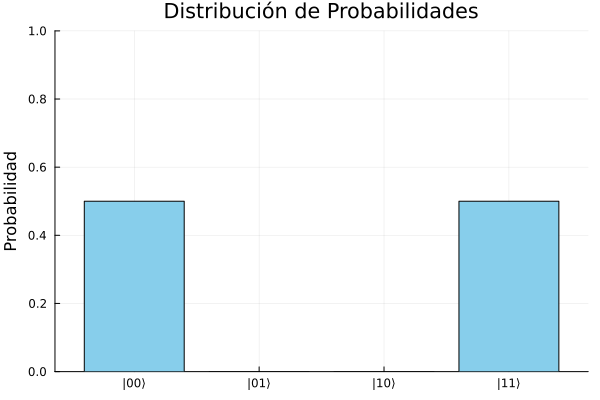

In [ ]:
using Plots

bar(basis_states, probs,
    title="Distribución de Probabilidades",
    ylabel="Probabilidad",
    legend=false,
    color=:skyblue,
    ylims=(0,1))